In [1]:
import os
import cv2
from cvloop import cvloop
import face_recognition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import matrix
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from PIL import Image
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

Using TensorFlow backend.


In [2]:
def video_to_frames(video, path_output_dir):
    vidcap= cv2.VideoCapture(video)
    count= 0
    while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
            cv2.imwrite(os.path.join(path_output_dir, '%d.png') % count, image)
            count += 1
        else:
            break
    vidcap.release()
    
    
def get_face_embeddings(path):
    total_frames=len(os.listdir(path))
    l=total_frames//n_sample_img
    img_list=[str(l*i + np.random.randint(l))+'.png' for i in range(n_sample_img)]

    known_images=[face_recognition.load_image_file(path +'/'+ x)  for x in img_list]        
    known_encodings=[face_recognition.face_encodings(y)[0]  for y in known_images]
    avg=np.mean(known_encodings,axis=0)
    return avg


def store_face_embedding(face_embed):
    user_id=input("plz enter ur userid")
    name=input("plz enter name")
    data_frame.loc[user_id]=[name,face_embed]
    print(data_frame)
    

def face_detect(frame):
    face_locations = face_recognition.face_locations(frame)    
    for (t,r,b,l) in face_locations:
        frame = cv2.rectangle(frame, (l, t), (r, b), (0,0,255), 2)
        #cv2.putText(frame, 'hee', (r, b), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=cv2.LINE_AA,thickness=2)
        
    return frame

def face_recog(frame):
    known_encoding=data_base.loc[emp_id]['Face_Embedding']
    unknown_encoding = face_recognition.face_encodings(frame)[0]
    results = face_recognition.compare_faces([known_encoding], unknown_encoding) 
    
    if results[0] == True:
        name =data_base.loc[emp_id]['Name']
    else:
        name = 'Unknown'
            
    face_locations = face_recognition.face_locations(frame)
    for (t,r,b,l) in face_locations:
        frame=cv2.rectangle(frame,(l,t),(r,b),(0,0,255),2)
        cv2.putText(frame, name, (l, t), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=cv2.LINE_AA,thickness=2) 
        
    return frame

def emotion_recog(frame):

    face_locations = face_recognition.face_locations(frame)    
    for (t, r, b, l) in face_locations: 
        frame=cv2.rectangle(frame, (l,t), (r,b), (0, 0, 255), 2)

        face=cv2.resize(frame[t:b, l:r],(48, 48))
        face_image = cv2.resize(face, (48, 48))
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])  

        preds = model.predict(face_image)[0]
        label = class_labels[preds.argmax()]
        cv2.putText(frame, label, (l, t), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), lineType=cv2.LINE_AA, thickness=2)
                     
    return frame

In [ ]:
#video_to_frames('/home/ubuntu/videos/interview_videos/Sample Video Interviews  HireArt.mp4', '/home/ubuntu/videos/data_frames')
#video_to_frames('/home/ubuntu/videos/interview_videos/video_interview.mp4', '/home/ubuntu/videos/data_frames1')
#video_to_frames('/home/ubuntu/videos/interview_videos/videoplayback.mp4', '/home/ubuntu/videos/data_frames2')
#video_to_frames('/home/ubuntu/videos/interview_videos/One_way_video_interview.mp4', '/home/ubuntu/videos/data_frames3')
#video_to_frames('/home/ubuntu/videos/interview_videos/Praxis_one_way_video_interview.mp4', '/home/ubuntu/videos/data_frames4')

In [ ]:
avg_face_embedding=get_face_embeddings('/home/ubuntu/videos/data_frames4')

In [ ]:
store_face_embedding(avg_face_embedding)

In [ ]:
data_frame.to_pickle("user_face_data.pickle")

In [ ]:
videos={1:['/home/ubuntu/videos/interview_videos/Sample Video Interviews  HireArt.mp4','345678'],2:['/home/ubuntu/videos/interview_videos/video_interview.mp4','765432'],3:['/home/ubuntu/videos/interview_videos/videoplayback.mp4','987654'],4:['/home/ubuntu/videos/interview_videos/One_way_video_interview.mp4','456723'],5:['/home/ubuntu/videos/interview_videos/Praxis_one_way_video_interview.mp4','986543']}

In [ ]:
data_base = pd.read_pickle("user_face_data.pickle")

In [ ]:
data_base

# Face Detection

In [13]:
def face_detect(frame):
    face_locations = face_recognition.face_locations(frame)    
    for (t,r,b,l) in face_locations:
        frame = cv2.rectangle(frame, (l, t), (r, b), (0,0,255), 2)
        #cv2.putText(frame, 'hee', (r, b), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=cv2.LINE_AA,thickness=2)
        
    return frame

<IPython.core.display.Javascript object>


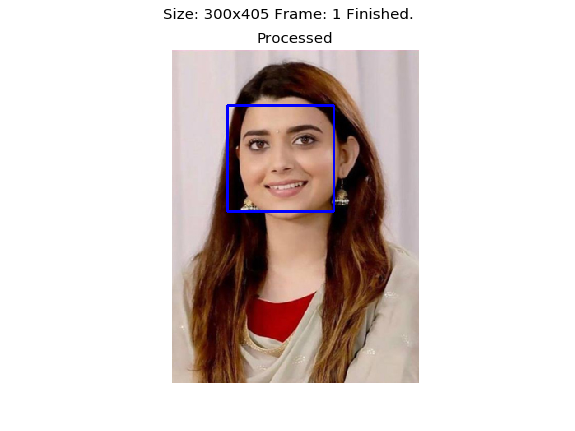

In [14]:
cvloop('./test_images2/nimrat2.jpg',function=face_detect)
#cvloop('/home/ubuntu/videos/interview_videos/videoplayback.mp4' ,function=face_detect )

# Facial Landmarks

In [15]:
def face_landmarks(frame):
    face_landmarks = face_recognition.face_landmarks(frame)
    
    for i in face_landmarks:
        for j in list(i.values()):
            pts = np.array(j, np.int32)
            frame = cv2.polylines(frame, [pts], False, (0,255,255), 1)
            
    return frame

<IPython.core.display.Javascript object>


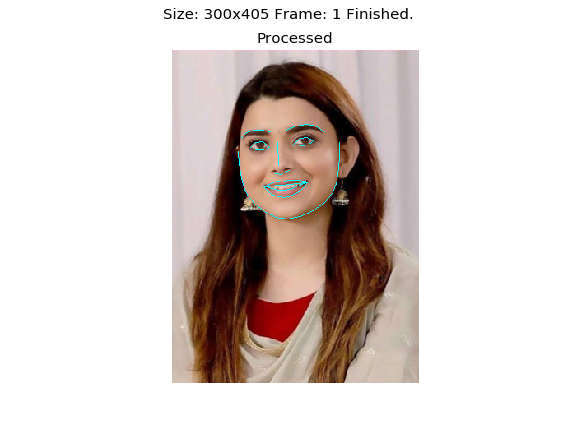

In [16]:
cvloop('./test_images2/nimrat2.jpg',function=face_landmarks)

# Face Recognition

In [24]:
known_image = face_recognition.load_image_file('./test_images/srk.jpg')
known_encoding = face_recognition.face_encodings(known_image)[0]

In [37]:
known_encoding

array([-0.10342473,  0.07279456, -0.00506525,  0.01386885, -0.09684515,
        0.00379412, -0.04507733, -0.15332787,  0.14047115, -0.05463708,
        0.24420935,  0.10033669, -0.20332478, -0.08483368, -0.0704706 ,
       -0.00046428, -0.0457294 , -0.1219916 , -0.11786845, -0.05494198,
       -0.06462218,  0.0016676 ,  0.03007008,  0.05552654, -0.07602265,
       -0.27104664, -0.07844733, -0.08608398,  0.07311248, -0.08398923,
       -0.01333278, -0.01941208, -0.18627703, -0.09404068,  0.04352462,
        0.0361054 , -0.01102953,  0.03060906,  0.25749332, -0.04390849,
       -0.13310607,  0.029385  ,  0.06552398,  0.28188068,  0.11812218,
        0.08214109,  0.05298927, -0.12624918,  0.16527821, -0.18994199,
        0.14594963,  0.16039042,  0.1128661 , -0.00790031,  0.08815863,
       -0.21593973, -0.04982049,  0.13398343, -0.12612088,  0.13041346,
        0.03781388,  0.03943964, -0.04137439, -0.05823927,  0.23904985,
        0.14913765, -0.07403255, -0.17913137,  0.16135935, -0.20

In [31]:
def face_recog(frame):
    #Compare encodings
    unknown_encoding = face_recognition.face_encodings(frame)[0]
    results = face_recognition.compare_faces([known_encoding], unknown_encoding)
    
    if results[0] == True:
        name = 'SRK'
    else:
        name = 'Unknown'
    
    frame = cv2.putText(frame, name,(10,80), cv2.FONT_HERSHEY_SIMPLEX, 3, 255, thickness=2)
    return frame

<IPython.core.display.Javascript object>


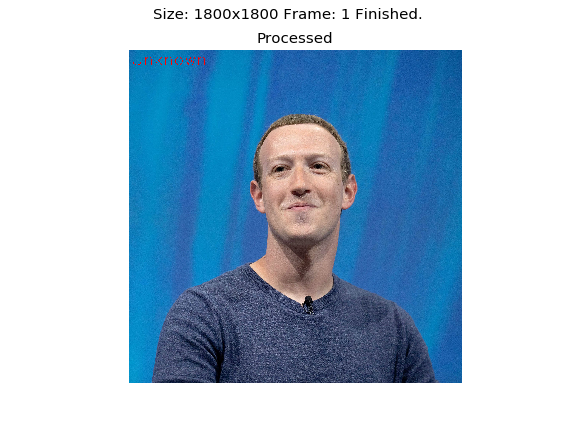

In [33]:
cvloop('./test_images2/mark2.jpg',function=face_recog)

# Face Recognition

In [ ]:
i=4
emp_id= videos[i][1] 
cvloop(videos[i][0] ,function=face_recog )

# Emotion Detection

In [ ]:
class_labels= {0:'Angry', 5:'Sad', 4:'Neutral', 1:'Disgust', 6:'Surprise', 2:'Fear', 3:'Happy'}

In [ ]:
#loading a pre-trained model
model = load_model("model_v6_23.hdf5")

In [ ]:
model.summary()

In [ ]:
cvloop('/home/ubuntu/videos/interview_videos/videoplayback.mp4' , function=emotion_recog)

In [ ]:
def get_face_area(path):
    
    cap = cv2.VideoCapture(path)  
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    print("Frame Count: %d frames"%int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
    
    while(cap.isOpened()):
        ret, frame = cap.read()       
        if ret == True: 
            face_locations =face_recognition.face_locations(frame)
            for face_location in face_locations:
                t,r,b,l=face_location
                frame_area=width*height
                w=r-l
                h=b-t
                face_area=w*h
                
                ratio=(face_area/frame_area)*100
                print(ratio,t,r,b,l)
        else:
            break
            
    cap.release()
     

In [ ]:
get_face_area('/home/ubuntu/videos/interview_videos/adi_4.mp4')

In [ ]:
def user_distance(path):
    cap = cv2.VideoCapture(path)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    
    
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter('face_distance_adi.avi',fourcc, 20.0, (450,360))
    i=0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            face_locations = face_recognition.face_locations(frame)
            print(i)
            i+=1
            text = ""
            for face_location in face_locations:
                t,r,b,l = face_location
                
                frame_area=width*height
                w=r-l
                h=b-t
                face_area=w*h
                
                ratio=(face_area/frame_area)*100               
                frame = cv2.rectangle(frame, (l, t), (r, b), (0,0,255), 2)
                if ratio < 3.5:
                    text = "Too Far"
                elif ratio > 7.5:
                    text = "Too Close"
                else:
                    text = "Fair Distance"
            
            if not text:
                text = "Face not detected"
                
            cv2.putText(frame, text, (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 
                        lineType=cv2.LINE_AA, thickness=2) 

            out.write(frame)
                
        else:
            break
    cap.release()

In [ ]:
user_distance('/home/ubuntu/videos/interview_videos/videoplayback.mp4')

In [1]:
def brightness( im_file ):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.mean[0]


In [5]:
b = brightness('test.jpg')
img = cv2.imread('test.jpg')
img = cv2.resize(img, (600,400))
img = cv2.putText(img, "Brightness : %f"%b, (50,50),  cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 
                        lineType=cv2.LINE_AA, thickness=2)
plt.imshow(img)

NameError: name 'ImageStat' is not defined

In [ ]:
def video_intensity(path):
    
    cap = cv2.VideoCapture(path)  
    
    brightness = []
    while(cap.isOpened()):
        ret, frame = cap.read()       
        if ret == True: 
            img_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            
            stat = ImageStat.Stat(img_gray)
            brightness.append(np.mean(img_gray))
        else:
            break
            
    cap.release()
    return brightness
     

In [ ]:
plt.plot(video_intensity('/home/ubuntu/videos/interview_videos/adi_4.mp4'))

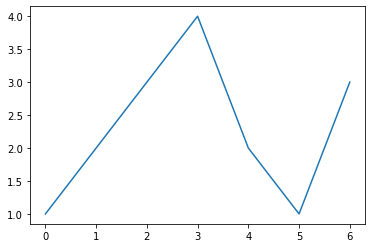

In [28]:
plt.plot([1,2,3,4,2,1,3])